# Boosting 
Boosting is an ensemble modeling technique that attempts to build a strong classifier from the number of weak classifiers. It is done by building a model by using weak models in series. 

# Advantage 
Improved Accuracy – Boosting can improve the accuracy of the model by combining several weak models’ accuracies and averaging them for regression or voting over them for classification to increase the accuracy of the final model. 
Robustness to Overfitting – Boosting can reduce the risk of overfitting by reweighting the inputs that are classified wrongly. 
Better handling of imbalanced data – Boosting can handle the imbalance data by focusing more on the data points that are misclassified 
Better Interpretability – Boosting can increase the interpretability of the model by breaking the model decision process into multiple processes. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('mushrooms.csv')

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


<AxesSubplot:xlabel='class', ylabel='count'>

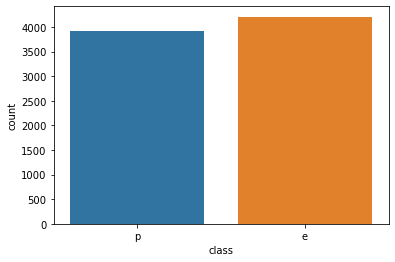

In [4]:
sns.countplot(data = df, x = 'class')

In [5]:
feat_uni = df.describe().transpose().reset_index().sort_values('unique')

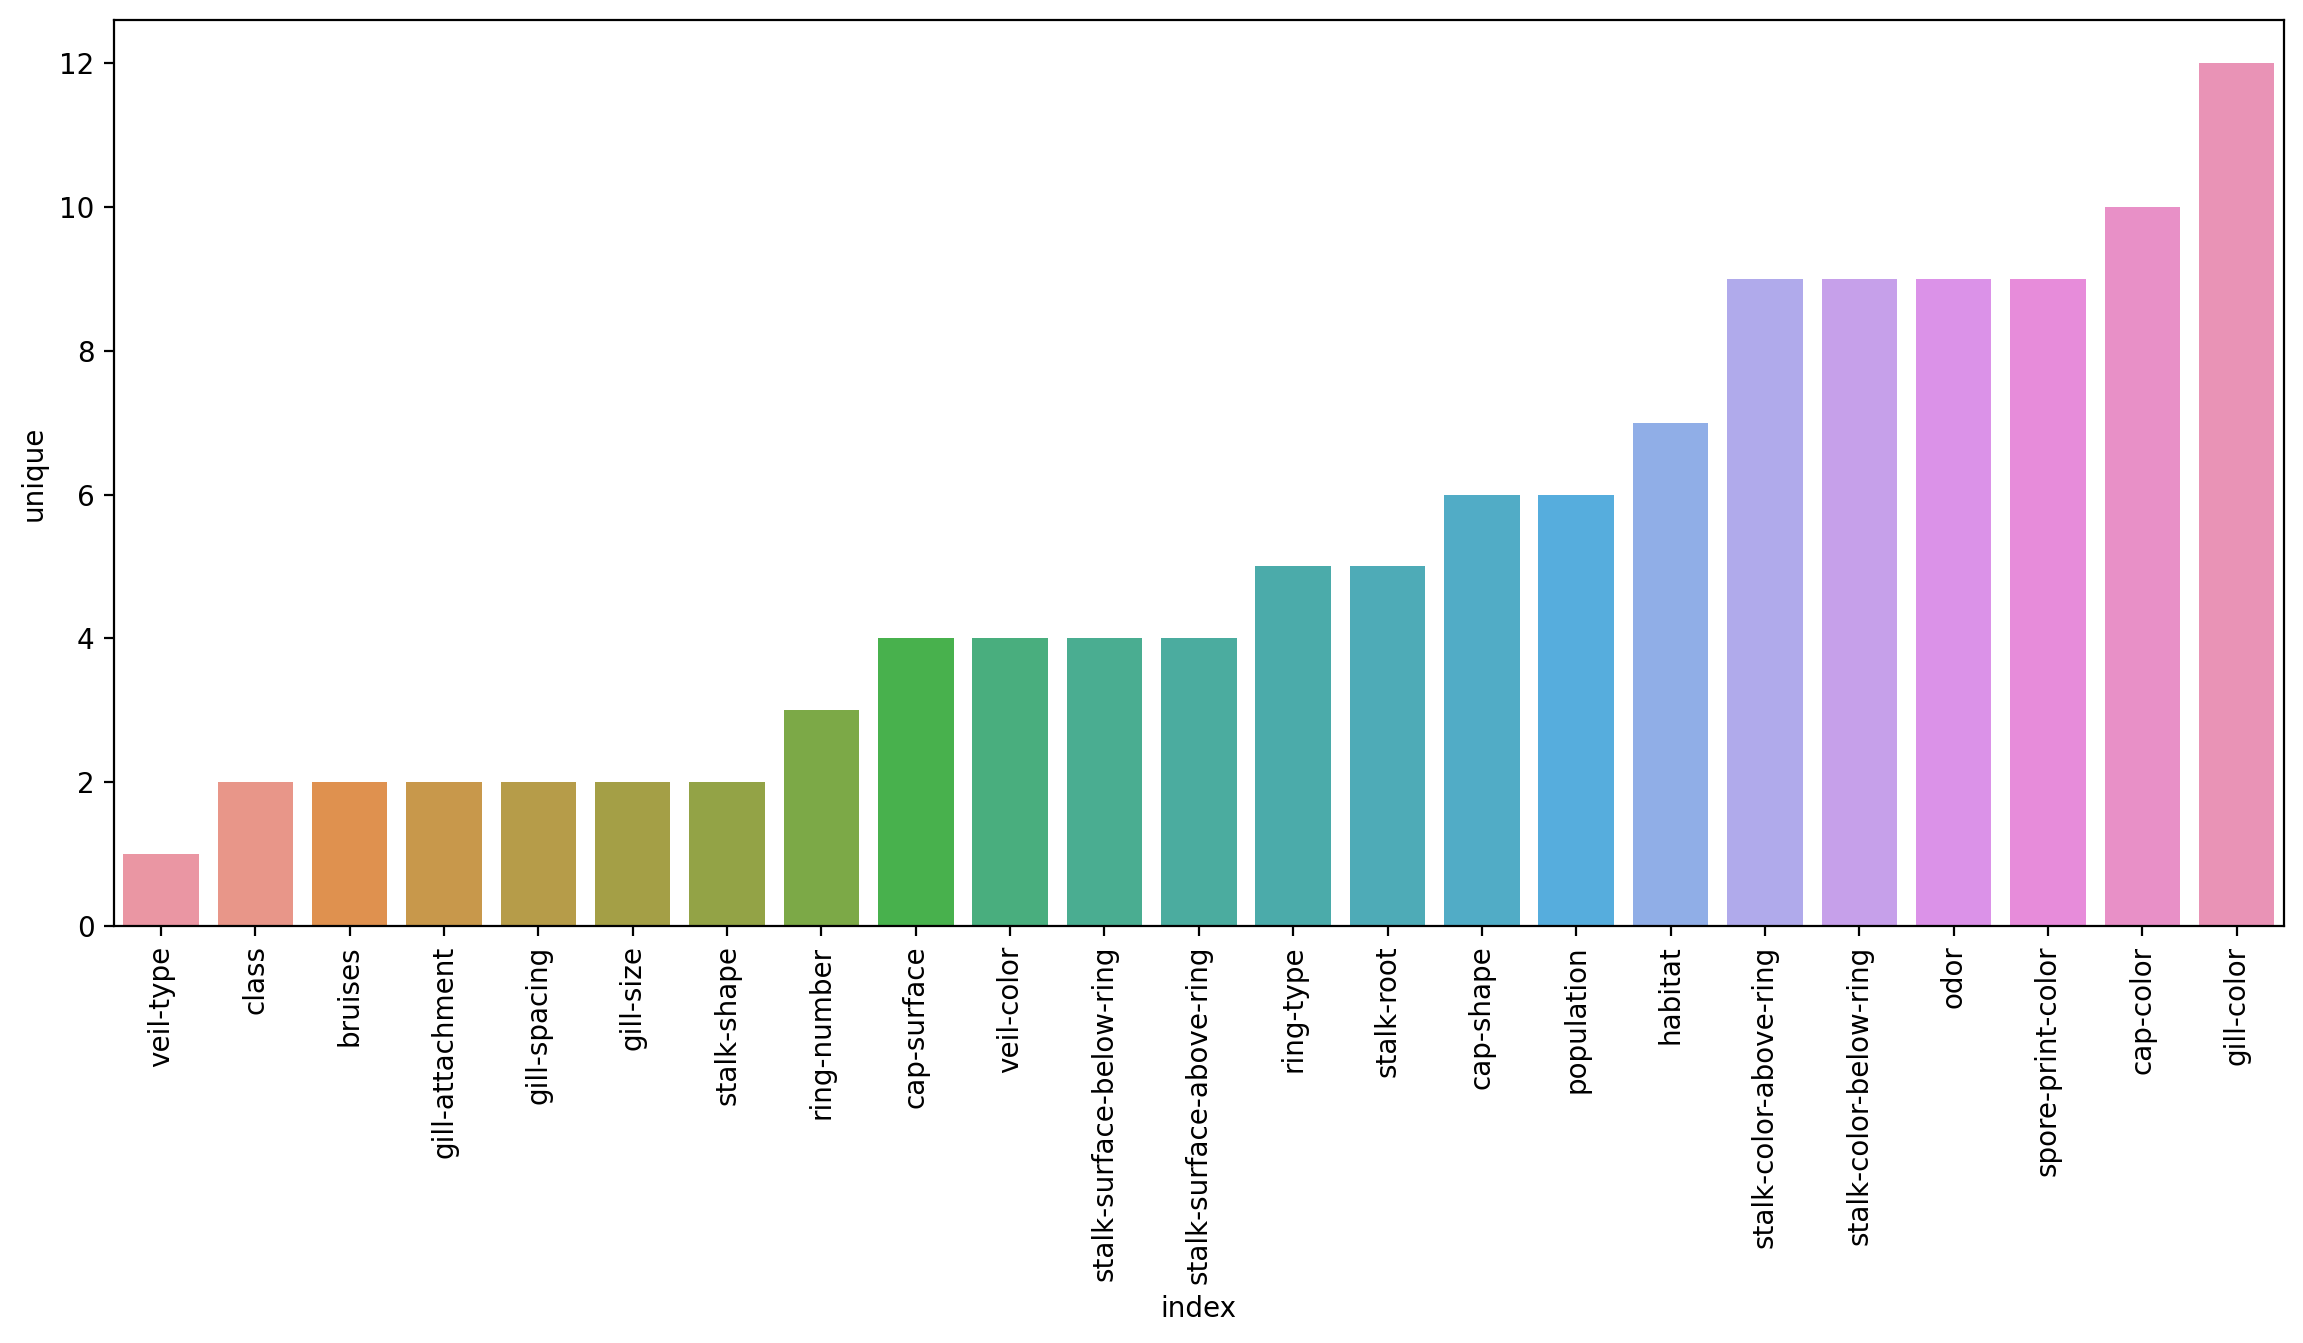

In [6]:
plt.figure(figsize = (14,6), dpi = 200)
sns.barplot(data = feat_uni, x = 'index', y = 'unique')
plt.xticks(rotation = 90);

In [7]:
X = df.drop('class', axis = 1)

In [8]:
y = df['class']

In [9]:
X = pd.get_dummies(X, drop_first=True)

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [12]:
from sklearn.ensemble import AdaBoostClassifier

In [13]:
model = AdaBoostClassifier(n_estimators=1)

In [14]:
model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=1)

In [15]:
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score

In [16]:
preds = model.predict(X_test)

In [17]:
preds

array(['p', 'e', 'p', ..., 'p', 'p', 'e'], dtype=object)

In [18]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           e       0.96      0.81      0.88       655
           p       0.81      0.96      0.88       564

    accuracy                           0.88      1219
   macro avg       0.88      0.88      0.88      1219
weighted avg       0.89      0.88      0.88      1219



In [19]:
model.feature_importances_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [20]:
model.feature_importances_.argmax()

22

In [21]:
X.columns[22]

'odor_n'

<AxesSubplot:xlabel='odor', ylabel='count'>

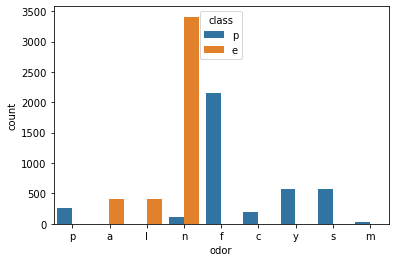

In [22]:
sns.countplot(data = df, x = 'odor', hue = 'class')

In [23]:
len(X.columns)

95

In [24]:
err_rates = []

for n in range(1,96):
    model = AdaBoostClassifier(n_estimators=n)
    model.fit(X_train,y_train)
    preds = model.predict(X_test)
    err = 1- accuracy_score(y_test, preds)
    err_rates.append(err)

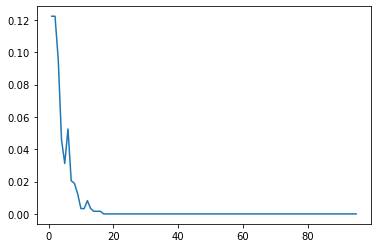

In [25]:
plt.plot(range(1,96), err_rates)

In [28]:
feat = pd.DataFrame(index = X.columns, data = model.feature_importances_, columns = ['Important'])

In [29]:
feat

,Important
cap-shape_c,0.000000
cap-shape_f,0.000000
cap-shape_k,0.000000
cap-shape_s,0.000000
cap-shape_x,0.000000
...,...
habitat_l,0.000000
habitat_m,0.000000
habitat_p,0.000000
habitat_u,0.000000


In [30]:
imp_feats = feat[feat['Important']>0]

In [31]:
imp_feats

,Important
cap-color_c,0.010526
cap-color_n,0.010526
cap-color_w,0.010526
bruises_t,0.052632
odor_c,0.031579
odor_f,0.031579
odor_n,0.063158
odor_p,0.021053
gill-spacing_w,0.094737
gill-size_n,0.094737


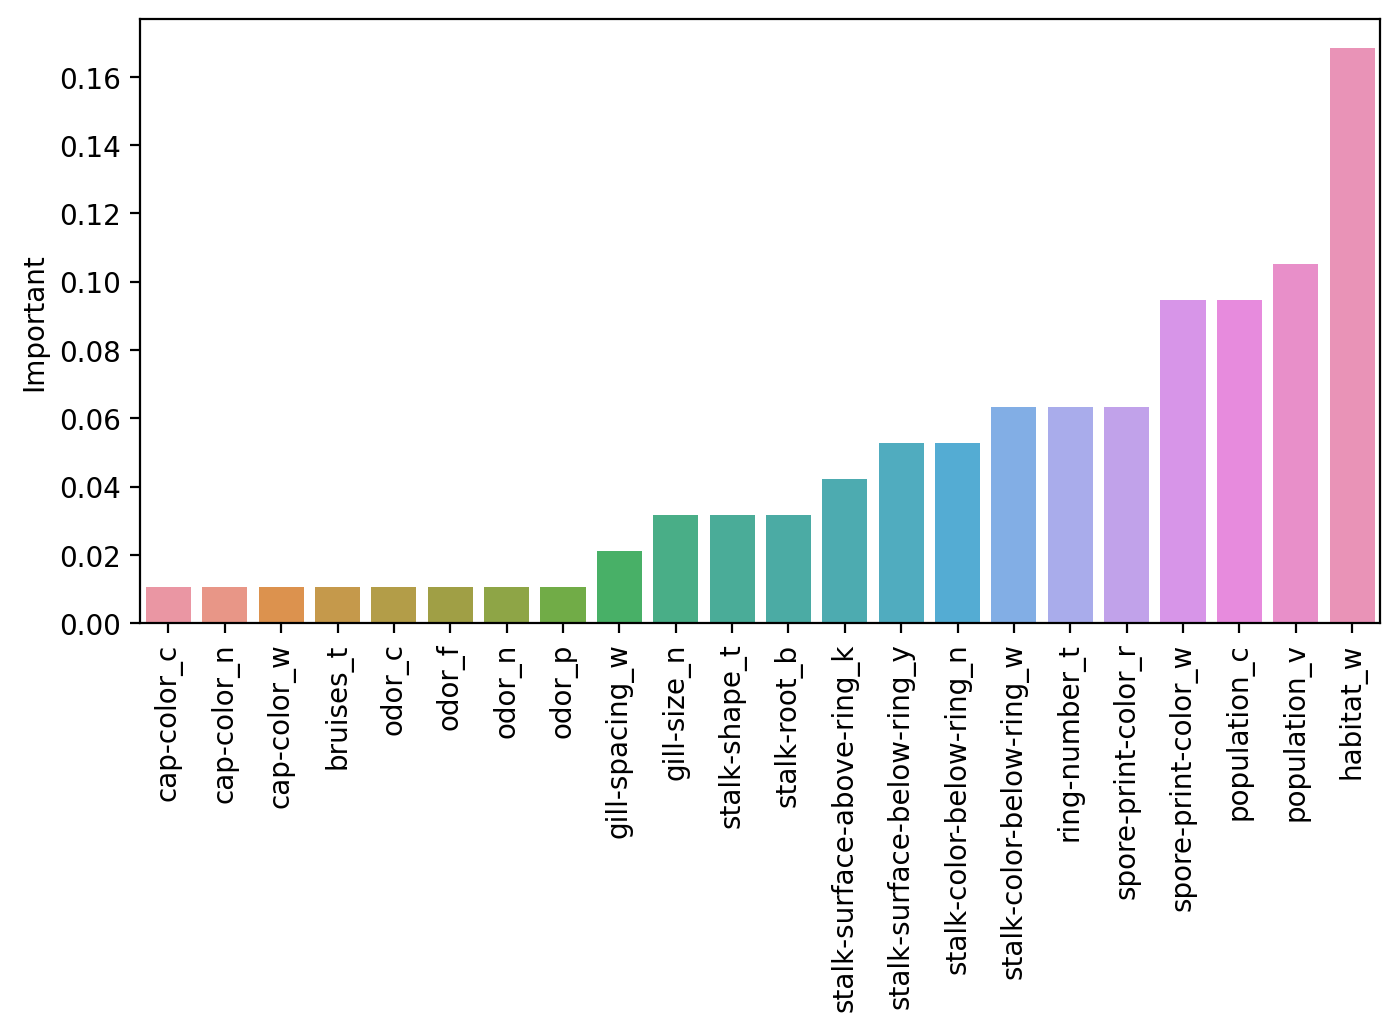

In [36]:
plt.figure(figsize = (8,4), dpi = 200)
sns.barplot(data = imp_feats.sort_values("Important"), x = imp_feats.index, y='Important')
plt.xticks(rotation = 90);